## This nodetbook analyses the answers of the train dataset
```
data/raw/dataset/raw_test_dataset.json
```


In [20]:
import json
import pandas as pd


# Load the JSON file
file_path = '../../../data/raw/dataset/raw_train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Convert to a DataFrame for easier analysis
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head()


,id,question,answer,author_dblp_uri
0,6b8aa79c-3908-4f03-b85b-aa1a325d9fe6,What type of information sources were found to...,oral communication and notes,<https://dblp.org/pid/w/TDWilson>
1,339bfd44-a71f-4057-a8a2-c84e1cc2c6ff,What is the cited by count for the writer's in...,3335304,<https://dblp.org/pid/m/MichelaMilano>
2,5da8b8e9-1ef5-4217-a06c-06b12324c991,What was the focus of the author's undergradua...,probability and statistics,<https://dblp.org/pid/d/TGDietterich>
3,d808ca0f-9b70-47a6-9b96-fb8f75cf0f1a,Where did the author of SPAA 1999 - Guest Edit...,"Indian Institute of Technology, Madras",<https://dblp.org/pid/s/RameshKSitaraman>
4,85c79cd1-0c96-4efd-a5a8-3ade69885173,In which year did the author join Epic Games a...,2021,<https://dblp.org/pid/j/SimonLPeytonJones>


count    6011.000000
mean       14.807353
std        18.293098
min         0.000000
25%         4.000000
50%         9.000000
75%        19.000000
max       339.000000
Name: answer_length, dtype: float64


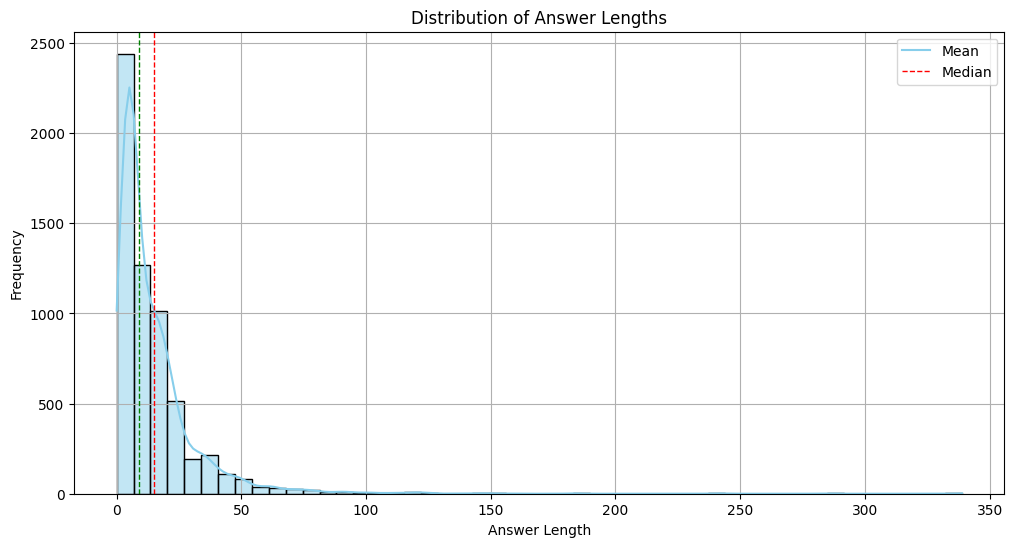

In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['answer_length'] = df['answer'].apply(len)

stats = df['answer_length'].describe()

print(stats)

plt.figure(figsize=(12, 6))
sns.histplot(df['answer_length'], bins=50, kde=True, color='skyblue')
plt.axvline(df['answer_length'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['answer_length'].median(), color='green', linestyle='dashed', linewidth=1)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length')
plt.ylabel('Frequency')
plt.legend({'Mean': df['answer_length'].mean(), 'Median': df['answer_length'].median()})
plt.grid(True)
plt.show()


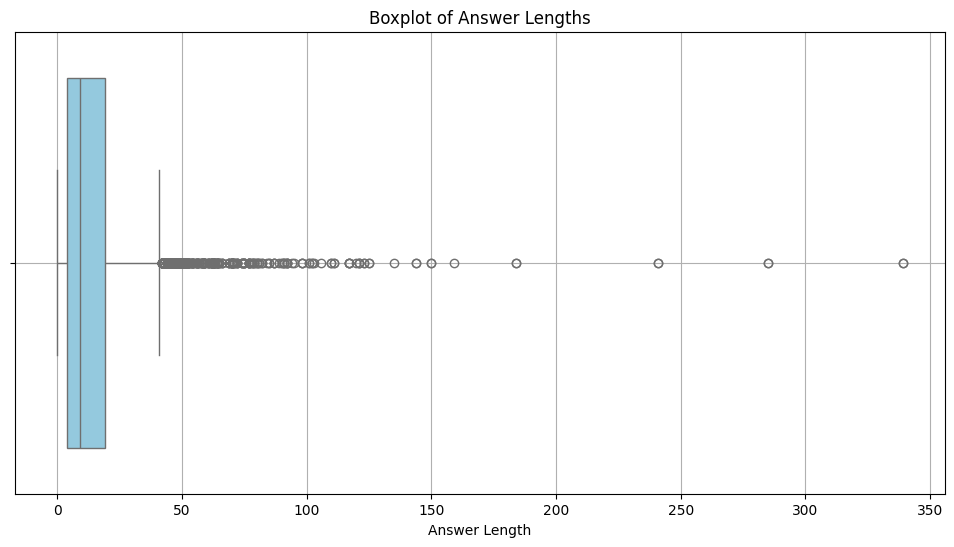

In [37]:
# Calculate the length of each answer
df['answer_length'] = df['answer'].apply(len)

# Create a statistics of answer lengths
stats = df['answer_length'].describe()

# Create a boxplot to visualize the outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['answer_length'], color='skyblue')
plt.title('Boxplot of Answer Lengths')
plt.xlabel('Answer Length')
plt.grid(True)
plt.show()

# Determine the number of outliers
Q1 = df['answer_length'].quantile(0.25)
Q3 = df['answer_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['answer_length'] < lower_bound) | (df['answer_length'] > upper_bound)]
num_outliers = outliers.shape[0]



In [49]:
# Calculate the length of each answer
df['answer_length'] = df['answer'].apply(len)

# Filter answers with length less than 2
short_answers = df[df['answer_length'] < 3]

# Display the answers
print(f"Number of answers with length less than 2: {short_answers.shape[0]}")
print(short_answers[['id', 'question', 'answer', 'answer_length']])

Number of answers with length less than 2: 514
                                        id  \
11    cda20ff7-b955-42ef-81d5-d18a8b4e49a7   
27    007a1979-f034-4deb-88be-ca81527f2eda   
44    8f44b768-fad8-4633-bced-ad587b74dbc4   
65    22f99b04-4636-4e4e-91b5-390fbb5c7250   
73    7e111d49-1171-4033-a152-df2bf6e1f975   
74    6afeba89-d041-4bb1-9bb5-2b09c23dcb80   
95    c31a3456-890f-445b-b4aa-605ebe46990f   
119   73d5b8b8-e4e5-4bd2-ae9b-28e5691cf636   
136   ecf3d63a-8ff1-4a65-82d4-5c640e19337f   
140   053bf0a1-072e-4e9e-8887-496cb1fdc68a   
155   48878249-2c3c-4097-82d6-733caeea3e22   
172   5a8e57b4-a128-4e61-ab2c-06f7eff4ed3d   
178   b7572007-e17c-4738-95eb-a1881503c617   
217   e23952bb-4a18-486c-b70b-a4b82c923720   
230   3599343d-06b4-4546-9dd5-e24d9c64e603   
232   5740e84e-5d3f-410c-9177-7956f5c1b094   
235   cdc02e43-f564-43eb-b405-0627714ffc97   
241   c9fa0a2f-def4-4154-8f6f-5e2050befc8d   
247   09251e09-4064-458f-becd-7d3a27e1cacf   
250   a5bbb7c3-1cce-401e-92a5-8b3

Number of answers with length less than 2 and no numbers: 110
                                        id  \
44    8f44b768-fad8-4633-bced-ad587b74dbc4   
63    ef530a34-d6f6-42d7-be14-3c0ad4fabc72   
84    ce273f3a-6097-4252-bab8-45e5f4f1113b   
88    3be929c6-708f-46d0-888e-32145b188320   
464   8ae2a0ed-9de9-4e1c-93c0-5132ded23e4e   
487   71968ea3-b4c8-45d3-8089-e67775dd0e79   
680   cfbc9ad1-29bd-40f0-8e08-d3853a3b0fe2   
789   f5fde033-99a6-4a4f-a1c4-6948fc0b673d   
808   0e65a65c-615c-4b9a-9afc-4755fde89359   
958   bcfda993-6f8a-41a2-b989-6f20fbd409c7   
971   bd493b7a-a90e-490a-9b3c-055f5ee7b079   
987   c610073f-cf77-4f60-bdd4-0294cb91e426   
991   8ec05fcb-cae2-4ada-b783-19adbe2e424b   
1041  0b672099-9714-4417-9ce3-60f8211ebda5   
1043  786fec94-154d-4c35-af5e-43984fe8d052   
1088  dcfdd257-3db8-4e4e-a333-b38cbbdb4426   
1123  af3dcbca-2db7-44b6-b689-bca32fbab4af   
1263  7f0f777f-23e9-440c-af39-7a3849bf1ca7   
1287  2c53974a-3fc7-4037-8194-33f5d193740a   
1333  3eb9e026-18a

In [51]:
# Calculate the length of each answer
df['answer_length'] = df['answer'].apply(len)

# Filter answers with length less than 5
short_answers = df[df['answer_length'] < 5]

# Filter answers that do not contain numbers
short_answers_no_numbers = short_answers[~short_answers['answer'].str.contains(r'\d', na=False)]

# Sort the answers by their length
sorted_answers = short_answers_no_numbers.sort_values(by='answer_length')

# Generate an HTML table
html_table = sorted_answers[['id', 'question', 'answer', 'answer_length']].to_html()

# Display the HTML table in the Jupyter Notebook
display(HTML(html_table))


,id,question,answer,answer_length
5340,c0e2fbc6-b3ba-40cc-84e3-0038142e7d34,Who is the spouse of the creator of The distribution of Pearson residuals in generalized linear models article?,,0
1435,51926d87-0103-4632-bdf7-3c6af8964a8e,Name the award earned by the author of 'Acceleration of the Jacobi iterative method by factors exceeding 100 using scheduled relaxation'?,,0
1263,7f0f777f-23e9-440c-af39-7a3849bf1ca7,Who is the spouse of the creator of The distribution of Pearson residuals in generalized linear models article?,,0
987,c610073f-cf77-4f60-bdd4-0294cb91e426,Name the award earned by the author of 'Acceleration of the Jacobi iterative method by factors exceeding 100 using scheduled relaxation'?,,0
4845,5d646b27-111c-49a0-ae0a-15d6081b2680,In which city does the engineer with publications on Integral Histogram and Joint tracking and video registration work as a Chief Scientist at Global Technologies Lab?,C,1
1835,acf68288-1bfb-4220-97f1-fc0382995df8,What is the birth date of the electrical engineer specializing in statistical time-series analysis and statistical inference with an emphasis on signal processing algorithm design and performance analysis?,N,1
1947,f75bd261-fce9-41a5-8ab2-619418957237,"Where is the professor who published 'A Remark on ""Reducing Iteration Time when Result Digit is Zero for Radix-2 SRT Division and Square Root with Redundant Remainders""' from?",T,1
2132,9246c36d-9663-4a45-8883-c5e3429f06a1,Where was the Chinese engineer who authored The Potential for Estimating Snow Depth With QuikScat Data and a Snow Physical Model born?,B,1
2220,86f8be4b-bfbb-4ada-ac98-1c5d9a3f0c68,Where was the scholar who wrote the paper on Online and Differentially-Private Tensor Decomposition born?,M,1
2331,91d0931a-8394-4782-8c5b-09cc4dcc33f2,Where did the contributor of Admissibilization of Singular Interval-Valued Fuzzy Systems study?,U,1


In [5]:
import json
import pandas as pd
from IPython.display import display, HTML
import re
# Load new json file
file_path = '../../../data/processed/cleand_dataset/train_dataset.json'
with open(file_path, 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df['answer_length'] = df['answer'].apply(len)
short_answers = df[df['answer_length'] < 5]
short_answers_no_numbers = short_answers[~short_answers['answer'].str.contains(r'\d', na=False)]
sorted_answers = short_answers_no_numbers.sort_values(by='answer_length')

html_table = sorted_answers[['id', 'question', 'answer', 'answer_length']].to_html()
display(HTML(html_table))

,id,question,answer,answer_length
5435,6bcd6ee5-7b7b-402f-b562-23e969771073,In which country was the author of 'Association vs. Prediction: The Impact of Cortical Surface Smoothing and Parcellation on Brain Age' raised?,UK,2
1415,07ce2d7f-e5c6-44dd-870d-049d64cf9fe1,What is the country of origin of the writer of Enhancement of Steady-State Performance in Direct-Torque-Controlled Dual Three-Phase Permanent-Magnet Synchronous Machine Drives With Modified Switching Table?,UK,2
1489,86875f33-a290-457a-8b90-629e7efa6f71,In which country was the author of 'Association vs. Prediction: The Impact of Cortical Surface Smoothing and Parcellation on Brain Age' raised?,UK,2
2858,016854a3-f20c-415f-9cde-b9267976b63e,Which institute granted a Ph.D. to the author of Locally Decodable Codes for edit distance in 1992?,MIT,3
3324,2cb39b2f-7fd0-49e3-a95a-1532fca09706,Where did the contributor of 'Evaluation of Texton Spatial Dependence Matrices for Breast Density Classification' initially work on shape analysis?,MIT,3
4230,08207a1b-465f-469f-bdef-1961882f687f,In which country did the author of 'Some shape definitions in fuzzy geometry of space' do his post-doc work from 1981-1982?,U.K,3
3042,f17a8c67-e659-400b-84df-6608f635a658,Which institute granted a Ph.D. to the author of Locally Decodable Codes for edit distance in 1992?,MIT,3
2811,37de5652-5626-48dc-b603-79e2217c1fdd,Where did the author of 'Machine Learning for Video-Based Rendering' hold a position as a research scientist from 1994 to 1996?,MIT,3
2741,f4753300-8f53-42ac-a88e-b35e340dd67b,Where did Jeffrey H. Shapiro receive his Ph.D. degree from?,MIT,3
3479,2b204352-5edd-4791-a696-de17e489da1d,Where did Jeffrey H. Shapiro receive his Ph.D. degree from?,MIT,3
